# Gender Recogintion from Iris pattern


In [2]:
import matplotlib.pyplot as plt 
import cv2
import numpy as np 
from src.HopefulDaugman import find_boundary

Some helper funciton

In [3]:
def showImage(image, title): 
    plt.figure()
    plt.title(title)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])

def showImageBGR(image, title):
    showImage(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), title)

## Segmentation

Resizing and cropping in RGB

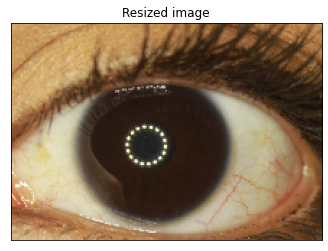

In [4]:
image = cv2.imread('L1.JPG')
M, N, C = image.shape
im_rgb_res = cv2.resize(image, (int(N/8),int(M/8)))
M2, N2, C2 = im_rgb_res.shape
im_rgb_foc = im_rgb_res[int(0.3*M2):int(0.65*M2), int(0.5*M2):int(M2)] 

showImageBGR(im_rgb_foc, "Resized image")

Resizing and cropping in gray scale

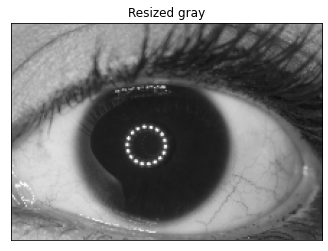

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
im_gray_res = cv2.resize(gray, (int(N/8),int(M/8)))
M2, N2 = im_gray_res.shape
im_gray_foc = im_gray_res[int(0.3*M2):int(0.65*M2), int(0.5*M2):int(M2)]

showImageBGR(im_gray_foc,"Resized gray")

Find iris Coordinates

((120, 114), 56)
((105, 87), 47)


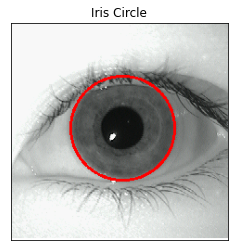

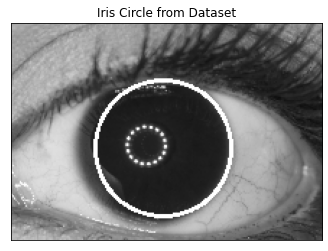

In [6]:
image2 = cv2.imread('iris.png')
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

minimal_iris_radius =30
iris_coordinates = find_boundary(gray2, minimal_iris_radius) #im_gray_foc
iris_coordinates_data = find_boundary(im_gray_foc, minimal_iris_radius)
print(iris_coordinates)
print(iris_coordinates_data)
iris_center, iris_rad = iris_coordinates
iris_center_data, iris_rad_data = iris_coordinates_data

#   Drawing the circle
iris_segmented = cv2.circle(image2, iris_center, iris_rad, (255, 0, 0), 2)
iris_segmented_data = cv2.circle(im_gray_foc, iris_center_data, iris_rad_data, (255, 0, 0), 2)

showImage(iris_segmented, "Iris Circle")
showImageBGR(iris_segmented_data, "Iris Circle from Dataset")


Find pupil Coordinates

((120, 114), 23)
((105, 87), 47)


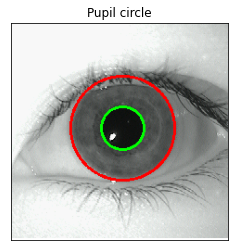

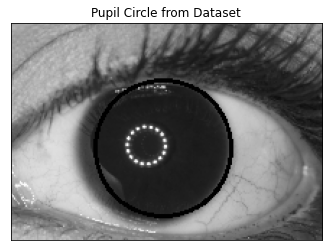

In [7]:
minimal_pupil_radius =10
coordinates = find_boundary(gray2, minimal_pupil_radius) #im_gray_foc
coordinates_data = find_boundary(im_gray_foc, minimal_pupil_radius)
print(coordinates)
print(coordinates_data)
pupil_center, pupil_rad = coordinates
pupil_center_data, pupil_rad_data = coordinates_data

# Drawing the circle
pupil_segmented = cv2.circle(iris_segmented, pupil_center, pupil_rad, (0, 255, 0), 2)
pupil_segmented_data = cv2.circle(iris_segmented_data, pupil_center_data, pupil_rad_data, (0, 255, 0), 2)

showImage(pupil_segmented, "Pupil circle")
showImageBGR(pupil_segmented_data, "Pupil Circle from Dataset")

## Normalizing

In [8]:
import src.Normalization as norm
import src.segment as seg 

testing another segmentation code

[114, 120, 55] [114, 120, 23]


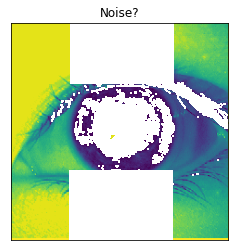

In [9]:
image2 = cv2.imread('iris.png')
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

ciriris, cirpupil, imWithNoise =seg.segment(gray2)
print(ciriris,cirpupil)

showImage(imWithNoise, "Noise?")

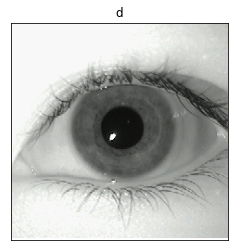

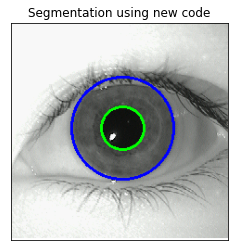

In [10]:
showImageBGR(image2, "d")

img_copy = image2.copy()
center = (ciriris[1],ciriris[0])
eye_segmented = cv2.circle(img_copy, center, ciriris[2], (255, 0, 0), 2)
center = (cirpupil[1],cirpupil[0])
eye_segmented = cv2.circle(eye_segmented, center, cirpupil[2], (0, 255, 0), 2)

showImageBGR(eye_segmented, "Segmentation using new code")

## Nomalizing using new segmentation

In [11]:
# Segmentation parameters
radial_res = 40    #vertical dimension
angular_res = 240    #horizontal dimension

img_copy = image2.copy()
polar_array, noise_array = norm.normalize(img_copy, ciriris[1], ciriris[0], ciriris[2], cirpupil[1], cirpupil[0], cirpupil[2], radial_res, angular_res)

polar_array.shape

(40, 240, 3)

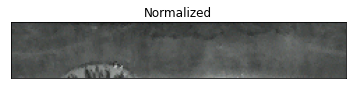

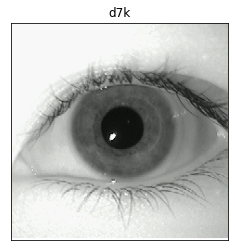

In [12]:
showImage(polar_array, "Normalized")
showImageBGR(image2, "Source")

## Normalizing using old segmentation

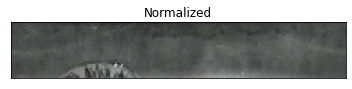

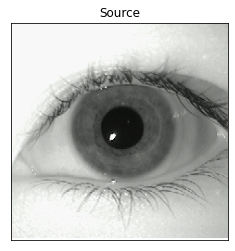

In [14]:
img_copy = image2.copy()
polar_array2, noise_array2 = norm.normalize(img_copy, iris_center[0], iris_center[1], iris_rad, pupil_center[0], pupil_center[1], pupil_rad, radial_res, angular_res)

polar_array.shape

showImage(polar_array2, "Normalized")
showImageBGR(image2, "Source")